In [1]:
import osmnx as ox
from matplotlib import pyplot as plt
from tqdm.auto import tqdm
import networkx as nx
import numpy as np

In [3]:
cam, som, bos = "Cambridge, MA, USA", "Somerville, MA, USA", "Boston, MA, USA"

camberville = ox.graph_from_place([cam,som], retain_all=True, simplify=True, network_type='all')
boscamberville = ox.graph_from_place([cam,som,bos], retain_all=True, simplify=True, network_type='all')
cam = ox.graph_from_place(cam, retain_all=True, simplify=True, network_type='all')
som = ox.graph_from_place(som, retain_all=True, simplify=True, network_type='all')
bos = ox.graph_from_place(bos, retain_all=True, simplify=True, network_type='all')

In [4]:
for e in camberville.edges(keys=True, data=True):
    print(e)
    break

(61151272, 1977481424, 0, {'osmid': 8603503, 'lanes': '2', 'name': 'Munroe Street', 'highway': 'residential', 'maxspeed': '25 mph', 'width': '15.2', 'oneway': False, 'reversed': False, 'length': 40.243})


In [5]:
u = []
v = []
keys = []
data = []
for u_, v_, key_, data_ in (camberville.edges(keys=True, data=True)):
    u.append(u_)
    v.append(v_)
    keys.append(key_)
    data.append(data_)

In [6]:
def noise():
    return np.random.normal(0, .05)

# Lists to store colors and widths 
road_colors = []
road_widths = []

for item in data:
    if "length" in item.keys():
        if item["length"] <= 100:
            linewidth = 0.10 + noise()
            color = "#a6a6a6" 
            
        elif item["length"] > 100 and item["length"] <= 200:
            linewidth = 0.15 + noise()
            color = "#676767"
            
        elif item["length"] > 200 and item["length"] <= 400:
            linewidth = 0.20 + noise()
            color = "#454545"
            
        elif item["length"] > 400 and item["length"] <= 800:
            color = "#bdbdbd"
            linewidth = 0.25 + noise()
        else:
            color = "#d5d5d5"
            linewidth = 0.35 + noise()

        if "primary" in item["highway"]:
            linewidth = 0.40 + noise()
            color = "#ffff"
    else:
        color = "#a6a6a6"
        linewidth = 0.10 + noise()
            
    if "footway" in item["highway"]:
        color = "#01016f" #"#ededed"
        # linewidth = 0.25 + noise()
    else:
        color = "#a6a6a6"
        # linewidth = 0.5 + noise()
        
    road_colors.append(color)
    road_widths.append(linewidth)
    

        
#     road_widths.append(linewidth)

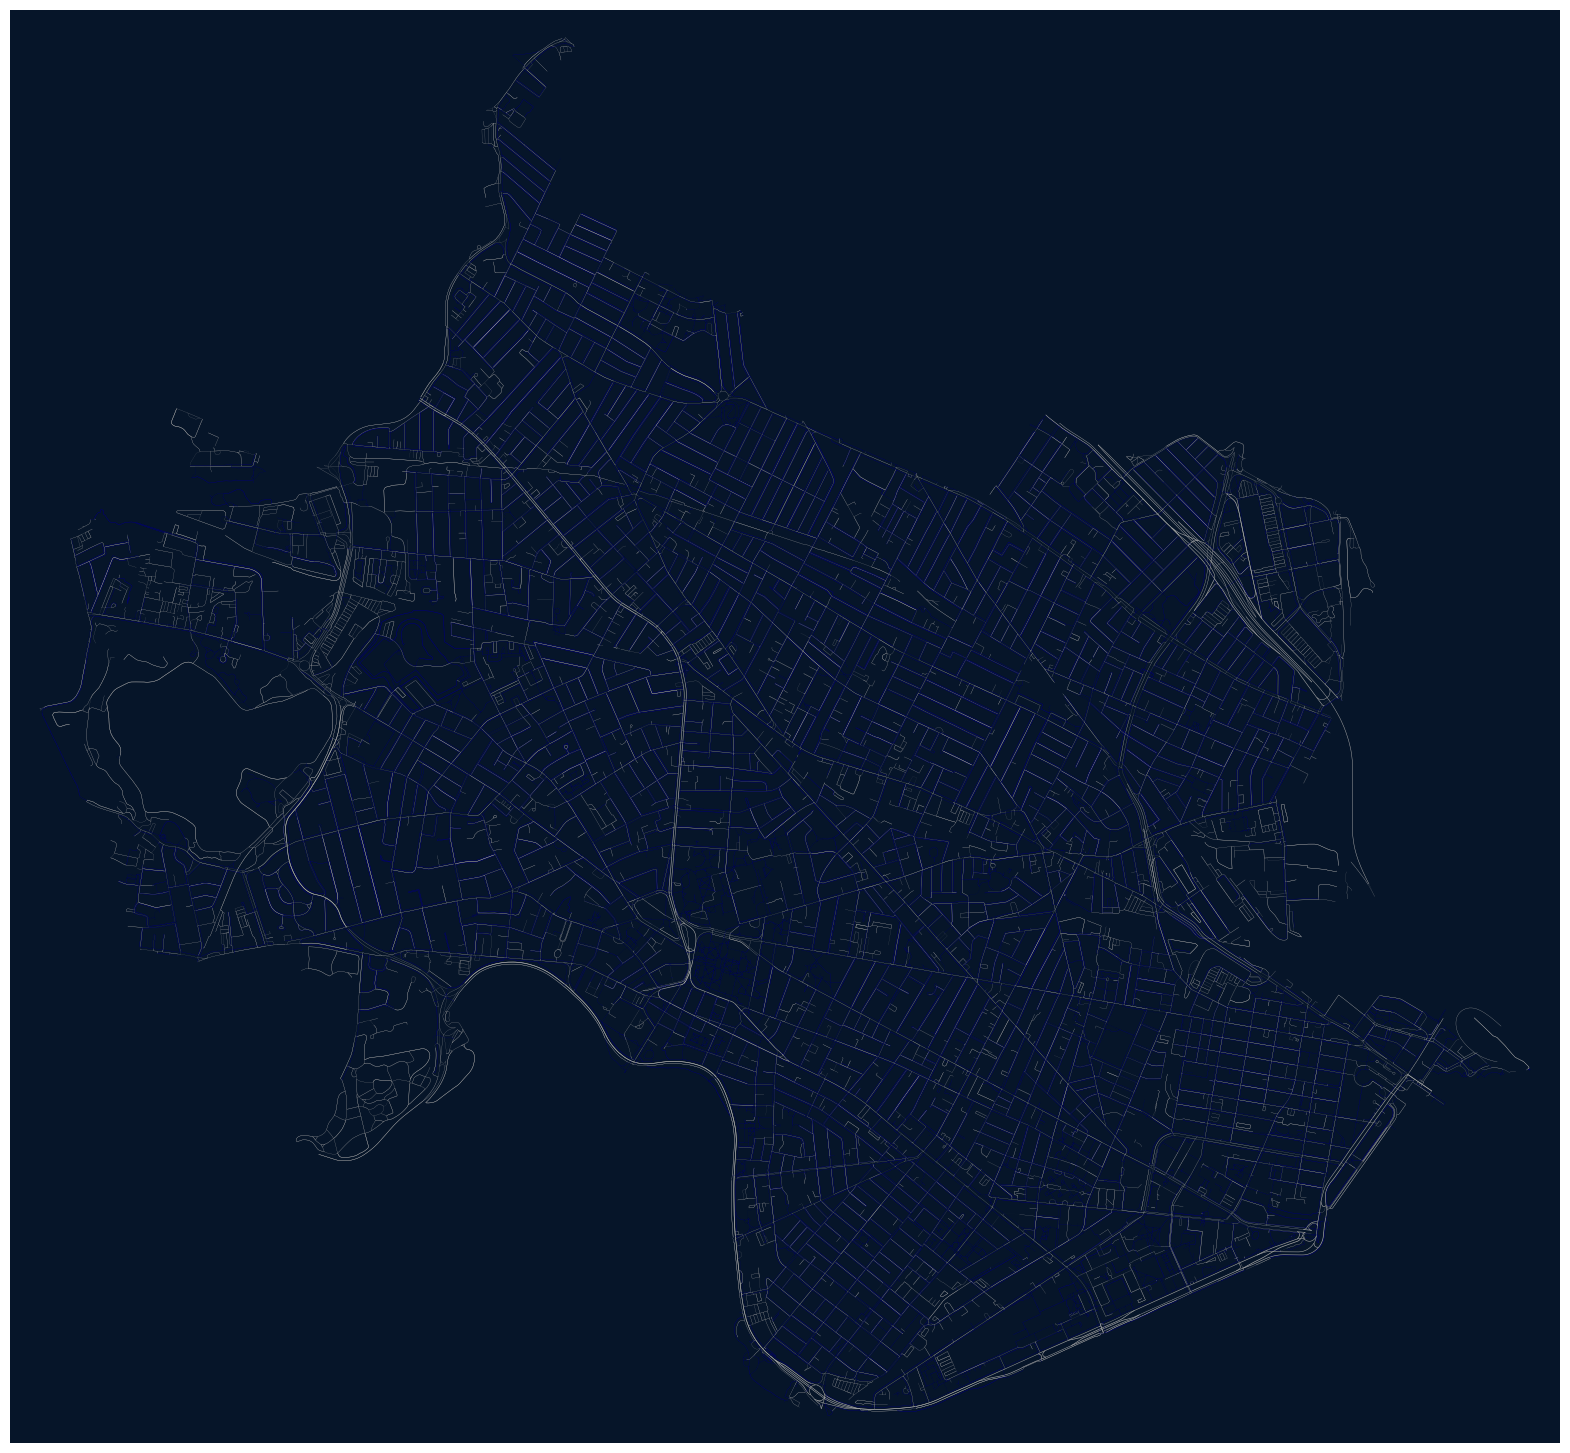

In [8]:
fig, ax = ox.plot_graph(camberville, 
                        node_size=0,
                        # bbox = (north, south, east, west),
                        dpi = 300, 
                        figsize=(20,20),
                        bgcolor="#061529",
                        save=True, 
                        edge_color=road_colors,
                        edge_linewidth=road_widths, 
                        edge_alpha=1)

fig.tight_layout(pad=0)